In [1]:
import pandas as pd
import numpy as np

KeyboardInterrupt: 

In [16]:
## set read/write paths for easy access

review_path = '/data/raw_reviews.csv'

review_df = pd.read_csv(review_path)
review_df.head()

,Unnamed: 0,recommendationid,author_steamid,playtime_at_review_minutes,playtime_forever_minutes,playtime_last_two_weeks_minutes,last_played,review_text,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,steam_purchase,received_for_free,written_during_early_access,Appname
0,0,212664845,76561197979706900,3752,3752,3038,1764995809,Addictive. Stressful. Time waster.,1764995842,1764995842,True,0,0,0.5,True,False,False,ARC Raiders
1,1,212664820,76561198968397284,8612,8612,1183,1764995767,fuak arc\r\n,1764995808,1764995808,True,0,0,0.5,True,False,False,ARC Raiders
2,2,212664759,76561198839360554,8168,8168,1250,1764988288,W,1764995728,1764995728,True,0,0,0.5,True,False,False,ARC Raiders
3,3,212664729,76561198290379303,200,200,200,1764992791,awesome game!,1764995683,1764995683,True,0,0,0.5,True,False,False,ARC Raiders
4,4,212664705,76561197963884718,3420,3420,2724,1764993456,If the Steam comments section is like every ot...,1764995649,1764995649,False,0,0,0.5,True,False,False,ARC Raiders


In [15]:
# review_df["playtime_at_review_minutes"].where(review_df["playtime_at_review_minutes"] == "playtime_at_review_minutes")

cleaned_review = review_df[
    review_df["playtime_at_review_minutes"].apply(lambda x: x != "playtime_at_review_minutes")
    ]

cleaned_review.to_csv('/data/raw_reviews.csv', mode='w')

In [19]:
agg_df = (
    review_df
    .groupby("Appname")
    .agg(
        {'playtime_at_review_minutes': ['mean', 'median'], 'playtime_forever_minutes': ['mean', 'median'], }
        )
    )

agg_df.head()



playtime_at_review_minutes           \
                                             mean   median   
Appname                                                      
7 Days to Die                        31795.163333  11978.5   
A Total War Saga: TROY                4401.680000   1548.5   
ARC Raiders                           3870.993333   2682.0   
ARK: Survival Ascended               21793.676667   4909.0   
Abiotic Factor                        6989.826667   5555.0   

                       playtime_forever_minutes           
                                           mean   median  
Appname                                                   
7 Days to Die                      32179.503333  12624.5  
A Total War Saga: TROY              6923.216667   2734.0  
ARC Raiders                         3933.150000   2754.5  
ARK: Survival Ascended             22834.700000   6079.5  
Abiotic Factor                      7137.993333   5600.0

In [20]:
agg_df.columns

MultiIndex([('playtime_at_review_minutes',   'mean'),
            ('playtime_at_review_minutes', 'median'),
            (  'playtime_forever_minutes',   'mean'),
            (  'playtime_forever_minutes', 'median')],
           )

In [21]:
agg_df[('playtime_at_review_minutes',   'mean')]

,playtime_at_review_minutes
,mean
Appname,
7 Days to Die,31795.163333
A Total War Saga: TROY,4401.680000
ARC Raiders,3870.993333
ARK: Survival Ascended,21793.676667
Abiotic Factor,6989.826667
...,...
World of Warships,15028.480000
Yakuza 0,4070.760000


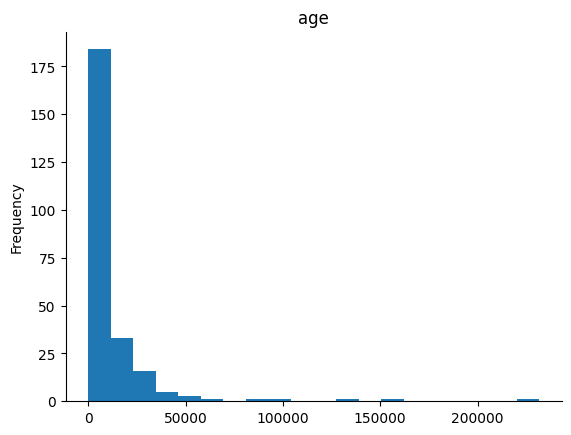

In [22]:
## visualize age
from matplotlib import pyplot as plt
agg_df[('playtime_at_review_minutes',   'mean')].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

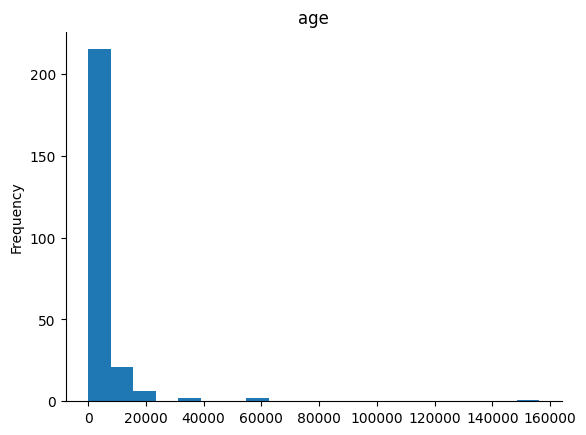

In [25]:
## visualize age
from matplotlib import pyplot as plt
agg_df[('playtime_at_review_minutes',   'median')].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

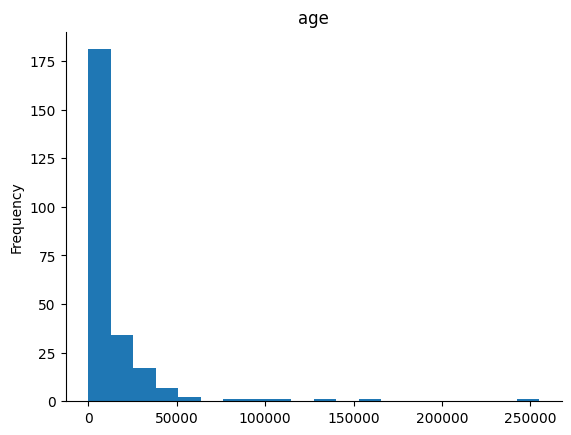

In [23]:
from matplotlib import pyplot as plt
agg_df[('playtime_forever_minutes',   'mean')].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

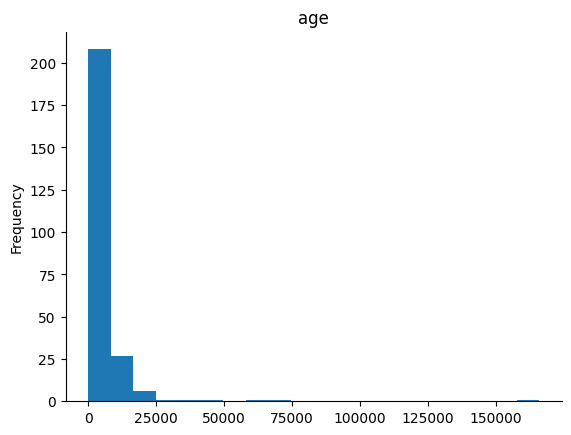

In [24]:
from matplotlib import pyplot as plt
agg_df[('playtime_forever_minutes',   'median')].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [26]:
agg_df["minutes_mean_diff"] = agg_df[('playtime_forever_minutes',   'mean')] - agg_df[('playtime_at_review_minutes',   'mean')]

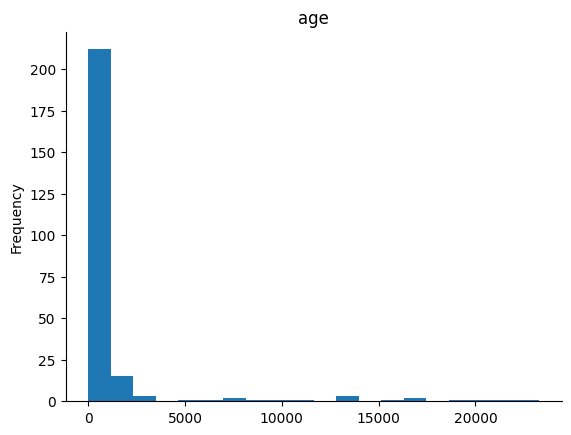

In [27]:
from matplotlib import pyplot as plt
agg_df["minutes_mean_diff"].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [29]:
agg_df["minutes_median_diff"] = agg_df[('playtime_forever_minutes',   'median')] - agg_df[('playtime_at_review_minutes',   'median')]

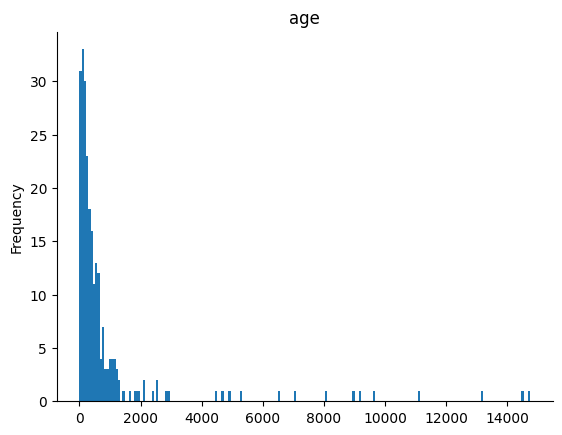

In [32]:
from matplotlib import pyplot as plt
agg_df["minutes_median_diff"].plot(kind='hist', bins=200, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

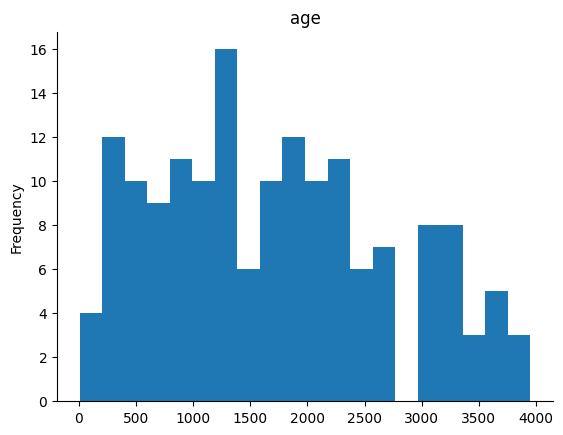

In [31]:
from matplotlib import pyplot as plt
agg_df[('playtime_forever_minutes',   'median')][
    agg_df[('playtime_forever_minutes',   'median')].apply(lambda x: x < 4000)
    ].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [37]:
agg_df[('playtime_forever_minutes',   'median')][
    agg_df[('playtime_forever_minutes',   'median')].apply(lambda x: x > 2400)
    ].shape

(125,)

In [38]:
2400 / 60

40.0

In [39]:
agg_df.shape

(247, 6)

In [42]:
def create_dependent_variable(row):
    if row[('playtime_forever_minutes',   'median')] > 2400:
        val = 1
    else:
        val = 0
    return val

agg_df['long_game'] = agg_df.apply(create_dependent_variable, axis=1)
agg_df.head(5)

playtime_at_review_minutes           \
                                             mean   median   
Appname                                                      
7 Days to Die                        31795.163333  11978.5   
A Total War Saga: TROY                4401.680000   1548.5   
ARC Raiders                           3870.993333   2682.0   
ARK: Survival Ascended               21793.676667   4909.0   
Abiotic Factor                        6989.826667   5555.0   

                       playtime_forever_minutes          minutes_mean_diff  \
                                           mean   median                     
Appname                                                                      
7 Days to Die                      32179.503333  12624.5        384.340000   
A Total War Saga: TROY              6923.216667   2734.0       2521.536667   
ARC Raiders                         3933.150000   2754.5         62.156667   
ARK: Survival Ascended             22834.700000   6079.5       1041.023333   
Abiotic Factor                      7137.993333   5600.0        148.166667   

                       minutes_median_diff long_game  
                                                      
Appname                                               
7 Days to Die                        646.0         1  
A Total War Saga: TROY              1185.5         1  
ARC Raiders                           72.5         1  
ARK: Survival Ascended              1170.5         1  
Abiotic Factor                        45.0         1

In [46]:
app_ids = pd.read_csv('/data/app_ids.csv')
app_ids.head()

,App ID,App Title
0,1675200,Steam Deck
1,1808500,ARC Raiders
2,2767030,Marvel Rivals
3,730,Counter-Strike 2
4,1142710,Total War: WARHAMMER III


In [51]:
# agg_df[["Appname", "long_game"]]

new_df = pd.merge(left=agg_df["long_game"],
right=app_ids,
left_index=True,
right_on="App Title"
)

new_df.shape
new_df.head()

,long_game,App ID,App Title
243,1,251570,7 Days to Die
298,1,1099410,A Total War Saga: TROY
1,1,1808500,ARC Raiders
102,1,2399830,ARK: Survival Ascended
189,1,427410,Abiotic Factor


In [52]:
new_df.set_index("App ID").head()


,long_game,App Title
App ID,,
251570,1,7 Days to Die
1099410,1,A Total War Saga: TROY
1808500,1,ARC Raiders
2399830,1,ARK: Survival Ascended
427410,1,Abiotic Factor


In [53]:
new_df.set_index("App ID").to_csv('/data/y_variable.csv')